In [478]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [479]:
data=pd.read_excel('Datasets/Copy of loan.xlsx')

In [480]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [481]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [482]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [483]:
data.sample(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
316,LP002035,Male,Yes,2,Graduate,No,3717,0.0,120.0,360.0,1.0,Semiurban,Y
423,LP002362,Male,Yes,1,Graduate,No,7250,1667.0,110.0,NaN,0.0,Urban,N
519,LP002684,Female,No,0,Not Graduate,No,3400,0.0,95.0,360.0,1.0,Rural,N
438,LP002403,Male,No,0,Graduate,Yes,10416,0.0,187.0,360.0,0.0,Urban,N
43,LP001131,Male,Yes,0,Graduate,No,3941,2336.0,134.0,360.0,1.0,Semiurban,Y
159,LP001552,Male,Yes,0,Graduate,No,4583,5625.0,255.0,360.0,1.0,Semiurban,Y
37,LP001112,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y
421,LP002357,Female,No,0,Not Graduate,No,2720,0.0,80.0,NaN,0.0,Urban,N
329,LP002087,Female,No,0,Graduate,No,2500,0.0,67.0,360.0,1.0,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [484]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [485]:
data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [486]:
data.Self_Employed.fillna(data['Self_Employed'].mode()[0],inplace=True,axis=0)

In [487]:
data.Dependents.fillna(data['Dependents'].mode()[0],inplace=True,axis=0)

In [488]:
data.Married.fillna(data['Married'].mode()[0],inplace=True,axis=0)

In [489]:
data.Gender.fillna(data['Gender'].mode()[0],inplace=True,axis=0)

In [490]:
data.Gender.isnull().sum()

0

Here The next some fields filling are not good way but we have small amount of data also it is not applicable int real life 

In [491]:
data.LoanAmount.fillna(data['LoanAmount'].mean(),inplace=True,axis=0)
data.Loan_Amount_Term.fillna(data['Loan_Amount_Term'].mode()[0],inplace=True,axis=0)
data.Credit_History.fillna(data['Credit_History'].mode()[0],inplace=True,axis=0)

In [492]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [493]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [494]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [495]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Here We Can also Use The One_Hot/dummy but which might result int the incrase in feature 

In [496]:
map={'Y':0,'N':1}
data['Loan_Status']=data['Loan_Status'].map(map)

In [497]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [498]:
map={'Urban':0,'Rural':1,'Semiurban':2}
data['Property_Area']=data['Property_Area'].map(map)

In [499]:
map={'Male':0,'Female':1}
data['Gender']=data['Gender'].map(map)

In [500]:
data.Gender.unique()

array([0, 1], dtype=int64)

In [501]:
map={'No':0 , 'Yes':1}
data['Married']=data['Married'].map(map)

In [502]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [503]:
map={'Graduate':1 , 'Not Graduate':0}
data['Education']=data['Education'].map(map)

In [504]:
data.Education.unique()

array([1, 0], dtype=int64)

In [505]:
map={'Yes':1 , 'No':0}
data['Self_Employed']=data['Self_Employed'].map(map)

In [506]:
data.Self_Employed.unique()

array([0, 1], dtype=int64)

In [507]:
data.drop(columns=['Loan_ID'],inplace=True)

In [508]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,0
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,1
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,0
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,0
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,0


In [509]:
data.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [510]:
data.Dependents.sample(50)

4       0
441     0
472    3+
2       0
461    3+
412     0
606     1
560     2
100     2
521     0
526     0
242     0
473     0
301     0
204     2
331     0
588     0
327     0
546     0
324    3+
326     0
84      1
183     1
338    3+
178     1
83      0
512     2
112     0
219     2
15      0
266     2
524     0
9       1
36      0
478     1
229     0
56      0
381     0
238     1
389     0
88      0
65      0
392     0
444     0
500     0
59      2
11      2
32      1
509     1
568     0
Name: Dependents, dtype: object

In [511]:
data['Dependents']=data['Dependents'].replace('3+','3')

In [512]:
data.Dependents.sample(50)

357    1
490    0
44     0
427    2
112    0
322    2
526    0
309    2
510    0
73     3
605    0
261    0
292    2
3      0
529    0
590    0
74     3
470    1
404    0
317    0
606    1
22     0
1      1
228    0
151    0
205    0
509    1
581    0
399    0
430    1
40     0
513    0
33     0
370    0
111    0
547    0
457    0
473    0
77     1
276    0
284    0
161    0
425    0
335    0
170    0
323    0
160    0
318    1
537    2
68     3
Name: Dependents, dtype: object

In [513]:
data.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [514]:
data['Dependents']=data['Dependents'].astype(int)

In [515]:
data.dtypes

Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [516]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,0
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,1
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,0
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,0
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,0


In [517]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [518]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.050489,0.312704
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [519]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,0.045364,0.000525,-0.058809,-0.082912,-0.107930,0.074030,-0.009170,0.082045,0.017987
Married,-0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.003071,-0.091478
Dependents,-0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,0.001781,-0.010118
Education,0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.073928,0.073658,0.003592,-0.085884
Self_Employed,0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,0.021996,0.003700
ApplicantIncome,-0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.007894,0.004710
CoapplicantIncome,-0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,-0.028356,0.059187
LoanAmount,-0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,0.013799,0.036416
Loan_Amount_Term,0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,0.086879,0.022549
Credit_History,-0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.030248,-0.540556


Here Not Particular Feature having more correlation among them it will be good (Tip- always Remove the Multicollinearity among Features)

<Axes: >

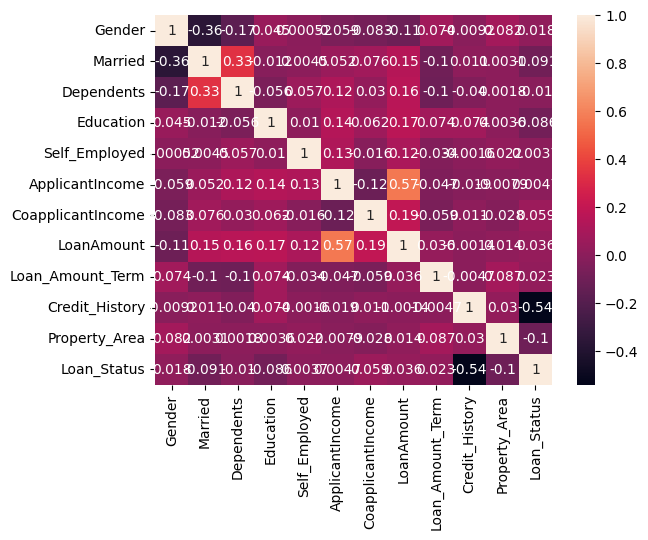

In [520]:
sns.heatmap(data.corr(),annot=True)

If You Want to Do Feature Engineering Them It will be Good Sign But We have Efficent Features 

In [521]:
Y=data['Loan_Status']
X=data.drop(columns=['Loan_Status'])

len(X),len(Y)

(614, 614)

In [522]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [523]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0


In [524]:
data.Credit_History.value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [525]:
data.Loan_Amount_Term.unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

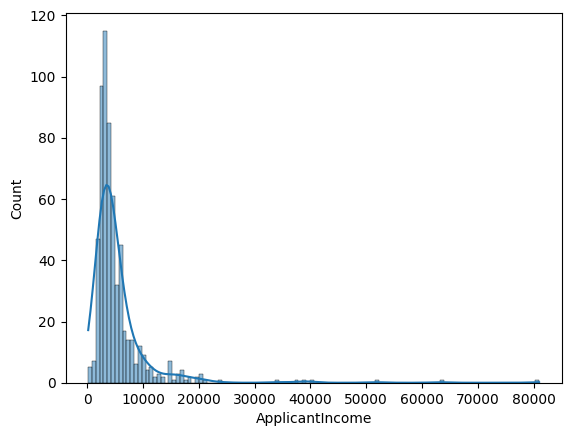

In [526]:
sns.histplot(data['ApplicantIncome'],kde=True)

In [527]:
log_data=np.log(data['ApplicantIncome'])

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

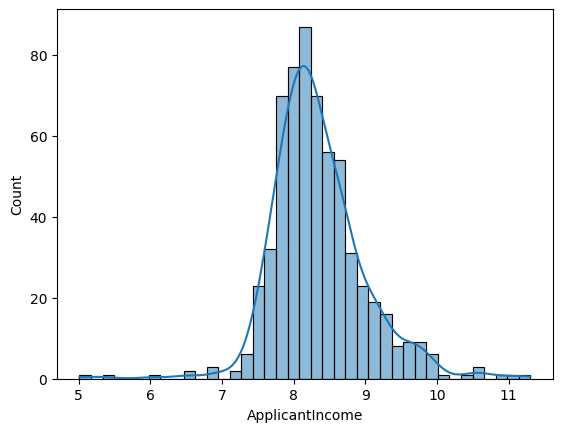

In [528]:
sns.histplot(log_data,kde=True)

In [529]:
data['ApplicantIncome']=np.log(data['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

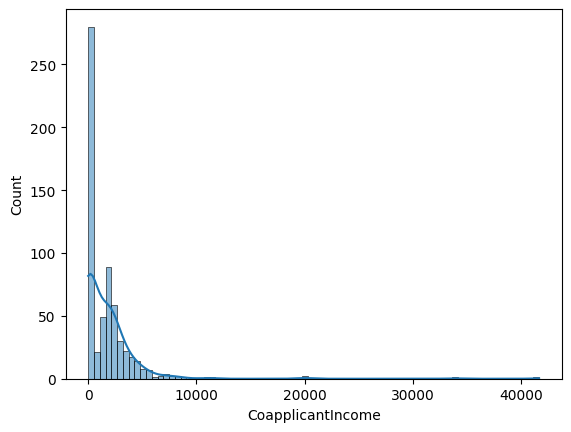

In [530]:
sns.histplot(data['CoapplicantIncome'],kde=True)

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

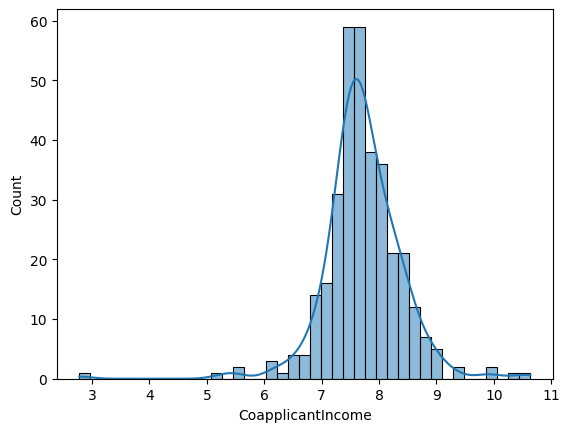

In [531]:
sns.histplot(np.log(data['CoapplicantIncome']),kde=True)

In [532]:
# data['CoapplicantIncome']=np.log(data['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

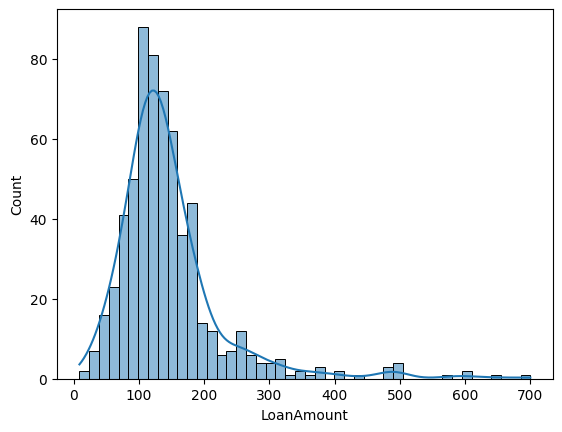

In [533]:
sns.histplot(data['LoanAmount'],kde=True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

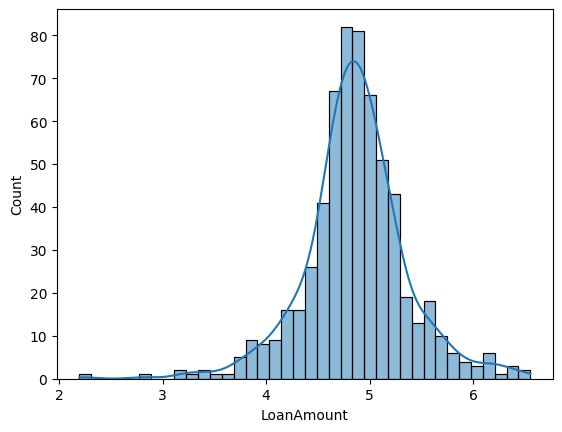

In [534]:
sns.histplot(np.log(data['LoanAmount']),kde=True)

In [535]:
data['LoanAmount']=np.log(data['LoanAmount'])

In [536]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,8.674026,0.0,4.986426,360.0,1.0,0,0
1,0,1,1,1,0,8.430109,1508.0,4.852030,360.0,1.0,1,1
2,0,1,0,1,1,8.006368,0.0,4.189655,360.0,1.0,0,0
3,0,1,0,0,0,7.856707,2358.0,4.787492,360.0,1.0,0,0
4,0,0,0,1,0,8.699515,0.0,4.948760,360.0,1.0,0,0


In [537]:
data['Total_income']=data['ApplicantIncome'] + data['CoapplicantIncome']

In [538]:
data.drop(columns=['CoapplicantIncome'],inplace=True)

In [539]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,0,0,0,1,0,8.674026,4.986426,360.0,1.0,0,0,8.674026
1,0,1,1,1,0,8.430109,4.852030,360.0,1.0,1,1,1516.430109
2,0,1,0,1,1,8.006368,4.189655,360.0,1.0,0,0,8.006368
3,0,1,0,0,0,7.856707,4.787492,360.0,1.0,0,0,2365.856707
4,0,0,0,1,0,8.699515,4.948760,360.0,1.0,0,0,8.699515


Upto Here We have Removed all the impurity and biases in the data 

In [541]:
std=StandardScaler()


In [542]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [543]:
x_train.shape,y_train.shape


((491, 11), (491,))

In [544]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
442,0,0,3,0,0,4707,1993.0,148.0,360.0,1.0,2
508,0,1,0,1,1,2479,3013.0,188.0,360.0,1.0,0
137,0,1,2,1,1,3316,3500.0,88.0,360.0,1.0,0
99,0,1,0,1,0,1759,3541.0,131.0,360.0,1.0,2
70,0,1,0,1,0,3208,3066.0,172.0,360.0,1.0,0


In [545]:
x_test.shape,y_test.shape

((123, 11), (123,))

In [546]:
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

loan Approval Prediction using Machine Learning | Machine Learning Projects 2022 | Simplilearn

In [547]:
lr=LogisticRegression()


In [548]:
lr.fit(x_train,y_train)

LogisticRegression()

In [549]:
from sklearn.metrics import accuracy_score

In [550]:
train_pred=lr.predict(x_train)

In [555]:
accuracy_score(train_pred,y_train)

0.8329938900203666

In [556]:
test_pred=lr.predict(x_test)

In [557]:
accuracy_score(test_pred,y_test)

0.7154471544715447

Here We Got 71 percent accuracy which we can say not bad but we can also improve from this and get more accuracy using the feature engineering and many ways and by finding some great patterns 

In [558]:
#This is the  line of the code to save the model 

import joblib

# Assuming 'model' is your trained model
joblib.dump(lr, 'loan_lr.pkl')


['loan_lr.pkl']